# Homework #4

**Ling 571 Computational Corpus Linguistics**  
Due November ~~16~~ 19

Name: ?

First, make your own copy of this notebook (File>Save a copy in Drive...).  Then write up your results below (showing all work!) in code and text blocks.  Finally, to turn in your answers, follow these steps:

* Make sure your name is on your notebook!
* Click on "Share"
* Click on "Get shareable link"
* Select "Anyone with the link can comment"
* Paste the link into the submission box for Homework #4 on blackboard

---

#### 0. Read chapters 1 and 2 of the [NLTK Book](https://www.nltk.org/book/) and download the corpora used in the examples.

In [0]:
import matplotlib.pyplot as plt
import nltk
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


---

#### 1. What are the 10 most frequent word bigrams (including punctuation) in the Brown corpus?

In [0]:
brown = nltk.corpus.brown
bwords = list(brown.words())
blowered = [w.lower() for w in bwords]

In [0]:
bigrams = nltk.bigrams(blowered)
bfreq = nltk.FreqDist(bigrams)
bfreq.most_common(10)

[(('of', 'the'), 9717),
 ((',', 'and'), 6302),
 (('.', 'the'), 6081),
 (('in', 'the'), 6025),
 ((',', 'the'), 3787),
 (('.', '``'), 3515),
 (('to', 'the'), 3484),
 (("''", '.'), 3332),
 ((';', ';'), 2784),
 (('.', 'he'), 2660)]

---

#### 2. Find all the words which occur at least 250 times in the Brown corpus but do not occur at all in *Moby-Dick*. For this problem, you should normalize both corpora by removing all punctuation and folding everything to lower case.

In [0]:
moby_words = [w.lower() for w in text1 if w.isalpha()]
brown_words = [w.lower() for w in bwords if w.isalpha()]
nonmoby_words = [w for w in brown_words if w not in moby_words]
nonmoby_freq = nltk.FreqDist(nonmoby_words)
nonmoby_dict = dict(nonmoby_freq)
nonmoby250 = [(x,y) for x, y in nonmoby_dict.items() if y >= 250]
print(nonmoby250)

[('program', 394), ('toward', 386), ('members', 325), ('af', 996)]


---

#### 3. Find the words in `nltk.corpus.words.words()`  that have the longest sequence of consonants. For example, *strengths* has 5 consonants in a row:  *n*, *g*, *t*, *h*, and *s*. Are there any longer sequences? For the purposes of this question, you should consider *y* to be a vowel and not a consonant.


In [0]:
import re
WORDS = nltk.corpus.words.words()

In [0]:
conclust6 = [w for w in WORDS if re.findall('[bcdfghjklmnpqrstvwxz]{6,}',w)]
print(len(conclust6))
conclust7 = [w for w in WORDS if re.findall('[bcdfghjklmnpqrstvwxz]{7,}',w)]
print(len(conclust7))

9
0


No words with 7+ consonant sequence; 9 with 6 consonant sequence

In [0]:
conclust6

['archchronicler',
 'bergschrund',
 'Eschscholtzia',
 'fruchtschiefer',
 'latchstring',
 'lengthsman',
 'Nachschlag',
 'postphthisic',
 'veldtschoen']

---

#### 4. The [Dale-Chall readability formula](https://en.wikipedia.org/wiki/Dale%E2%80%93Chall_readability_formula) is a measure of text readability based on a list of 3,000 easy words which fourth graders can be expected to be familar with.

If difficult words are ones which are not on the list of easy words, then the metric is defined as:

$$DC=0.1579\times\left(\frac{\text{#difficult words}}{\text{#words}}\right)+0.0496\times\left(\frac{\text{#words}}{\text{#sents}}\right)$$

If more than 5% of the words in the text are difficult, then add 3.6365


As a first step, you'll download the easy words and load them into a set:

In [0]:
!wget -q http://countwordsworth.com/download/DaleChallEasyWordList.txt

easy = set(w.strip() for w in open('DaleChallEasyWordList.txt'))

In [0]:
'yes' in easy, 'aardvark' in easy

(True, False)

Next,  write a function which calculates the *DC* score for a text:

In [0]:
from nltk import sent_tokenize

In [0]:
def DC(text):
    
  all_words = [w for w in text if w.isalpha]
  diff_words = [w for w in all_words if w not in easy]
    
  onebigstr = ' '.join(text)
  sents = sent_tokenize(onebigstr)
  
  num_all = len(all_words)
  num_diff = len(diff_words)
  num_sents = len(sents)
  print('Words:', num_all, 'Difficult Words:', num_diff, 'Sentences', num_sents)
  
  dcinitial =  0.1579*(num_diff/num_all) + .0496*(num_all/num_sents)
  diff_ratio = num_diff/num_all
   
  if (diff_ratio > .05):
    Score= dcinitial + 3.6365
  else:
    Score = dcinitial
  print('DC Score:',Score)  

In [0]:
DC(text5)

Words: 45010 Difficult Words: 25307 Sentences 2850
DC Score: 4.508611652108498


Then, use that function to print a table showing the readability level of Presidential inaugural addresses by year, as measured by the *DC* score:


In [0]:
from nltk.corpus import inaugural


In [0]:
for fileid in inaugural.fileids():

  all_words = [w for w in fileid if w.isalpha]
  diff_words = [w for w in all_words if w not in easy]
    
  onebigstr = ' '.join(fileid)
  sents = sent_tokenize(onebigstr)
  
  num_all = len(all_words)
  num_diff = len(diff_words)
  num_sents = len(sents)
    
  dcinitial =  0.1579*(num_diff/num_all) + .0496*(num_all/num_sents)
  diff_ratio = num_diff/num_all
   
  if (diff_ratio > .05):
    Score = dcinitial + 3.6365
  else:
    Score = dcinitial
  
  table = (f'{fileid:20} {Score:5.2f}')
  print(table)

1789-Washington.txt   4.26
1793-Washington.txt   4.26
1797-Adams.txt        4.13
1801-Jefferson.txt    4.24
1805-Jefferson.txt    4.24
1809-Madison.txt      4.18
1813-Madison.txt      4.18
1817-Monroe.txt       4.17
1821-Monroe.txt       4.17
1825-Adams.txt        4.13
1829-Jackson.txt      4.18
1833-Jackson.txt      4.18
1837-VanBuren.txt     4.21
1841-Harrison.txt     4.21
1845-Polk.txt         4.12
1849-Taylor.txt       4.16
1853-Pierce.txt       4.17
1857-Buchanan.txt     4.20
1861-Lincoln.txt      4.19
1865-Lincoln.txt      4.19
1869-Grant.txt        4.13
1873-Grant.txt        4.13
1877-Hayes.txt        4.13
1881-Garfield.txt     4.21
1885-Cleveland.txt    4.23
1889-Harrison.txt     4.21
1893-Cleveland.txt    4.23
1897-McKinley.txt     4.22
1901-McKinley.txt     4.22
1905-Roosevelt.txt    4.24
1909-Taft.txt         4.10
1913-Wilson.txt       4.17
1917-Wilson.txt       4.17
1921-Harding.txt      4.18
1925-Coolidge.txt     4.22
1929-Hoover.txt       4.17
1933-Roosevelt.txt    4.24
1

Finally, for extra credit, also show the results as a graph:

Text(0.5,1,'Dale-Chall Readability for Inaugural Addresses')

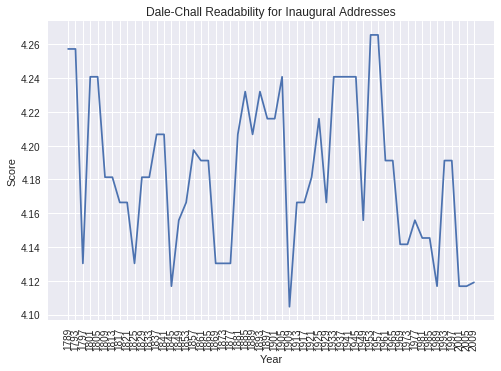

In [0]:
x=[]
y=[]
for fileid in inaugural.fileids():

  all_words = [w for w in fileid if w.isalpha]
  diff_words = [w for w in all_words if w not in easy]
    
  onebigstr = ' '.join(fileid)
  sents = sent_tokenize(onebigstr)
  
  num_all = len(all_words)
  num_diff = len(diff_words)
  num_sents = len(sents)
    
  dcinitial =  0.1579*(num_diff/num_all) + .0496*(num_all/num_sents)
  diff_ratio = num_diff/num_all
   
  if (diff_ratio > .05):
    Score = dcinitial + 3.6365
  else:
    Score = dcinitial
  
  table = (f'{fileid:20} {Score:5.2f}')

  x.append(fileid[:4])
  y.append(Score)
        
plt.plot(x, y)
plt.xticks(range(0,len(x)), rotation=90, )   # only label every 4th year
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Dale-Chall Readability for Inaugural Addresses')